In [1]:
#import thư viện
import pandas as pd
import numpy as np

# Trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns

# Tiền xử lý dữ liệu
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Chia tập và đánh giá mô hình
from sklearn.model_selection import(
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RepeatedStratifiedKFold)

# Các metrics đánh giá mô hình
from sklearn.metrics import(
    confusion_matrix,
    roc_auc_score,
    classification_report,
    accuracy_score,
    precision_recall_curve)

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif

# Xử lý mất cân bằng nhãn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Đếm tần suất
from collections import Counter
x_train=pd.read_csv(r'C:\GIT\GROUP__3\x_train.csv')
x_test=pd.read_csv(r'C:\GIT\GROUP__3\x_test.csv')
y_train=pd.read_csv(r'C:\GIT\GROUP__3\y_train.csv')
y_test=pd.read_csv(r'C:\GIT\GROUP__3\y_test.csv')

In [2]:
df=pd.read_csv(r'C:\GIT\stroke_prediction_repo\DATA\healthcare-dataset-stroke-data.csv')

ROC AUC Score: 84.37%
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       517
           1       0.80      0.89      0.84       459

    accuracy                           0.84       976
   macro avg       0.84      0.84      0.84       976
weighted avg       0.85      0.84      0.84       976



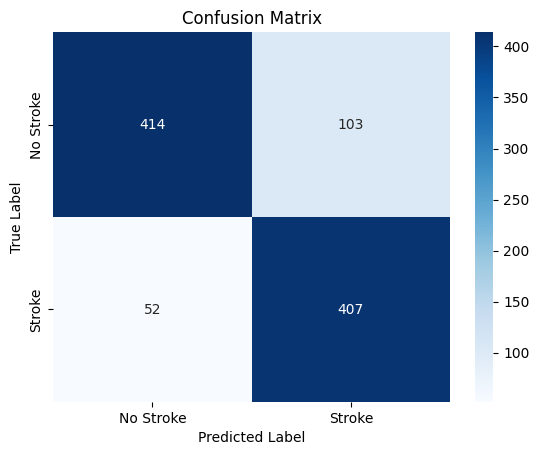

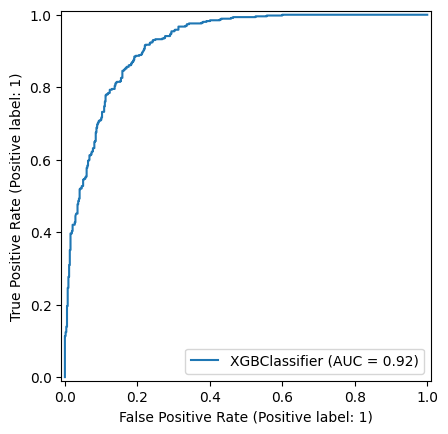

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import RocCurveDisplay

# Khởi tạo model XGBoost
xgb_model = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000, random_state=42)

# Train model
xgb_model.fit(x_train, y_train)

# Predict
y_pred = xgb_model.predict(x_test)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2%}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Hiển thị ma trận với nhãn rõ ràng
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')   
plt.show()

# ROC curve
RocCurveDisplay.from_estimator(xgb_model, x_test, y_test)
plt.show()

c:\python\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest:
ROC AUC Score: 76.13%
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       517
           1       0.69      0.86      0.77       459

    accuracy                           0.76       976
   macro avg       0.77      0.76      0.75       976
weighted avg       0.77      0.76      0.75       976



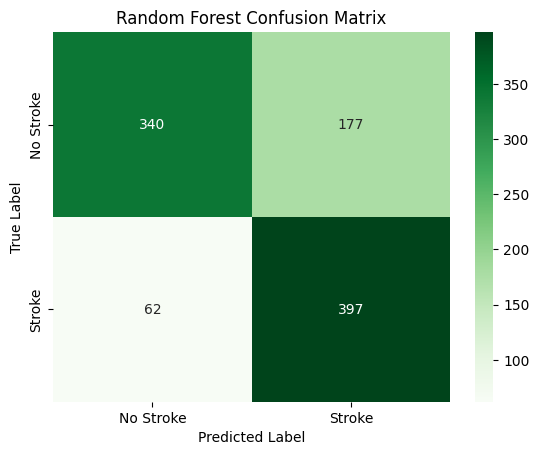

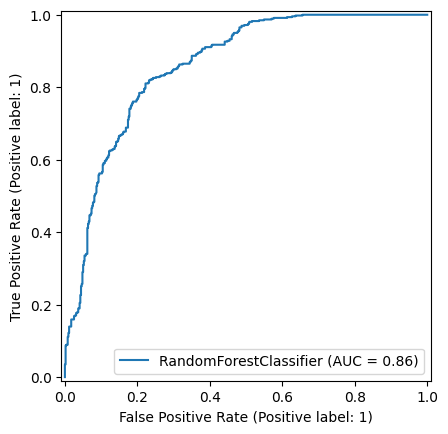

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=3, n_estimators=1000, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print("Random Forest:")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_rf):.2%}")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

RocCurveDisplay.from_estimator(rf_model, x_test, y_test)
plt.show()

Logistic Regression:
ROC AUC Score: 76.18%
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       517
           1       0.73      0.77      0.75       459

    accuracy                           0.76       976
   macro avg       0.76      0.76      0.76       976
weighted avg       0.76      0.76      0.76       976



c:\python\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


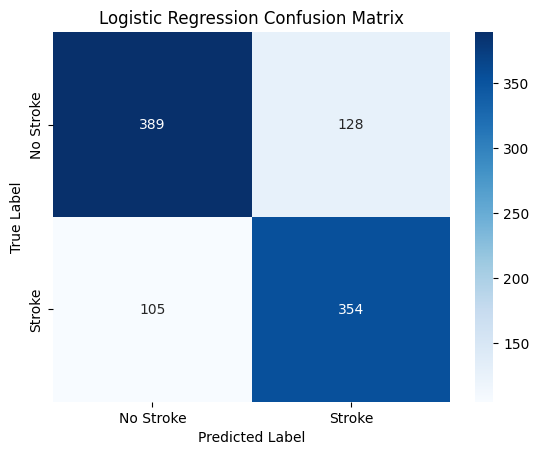

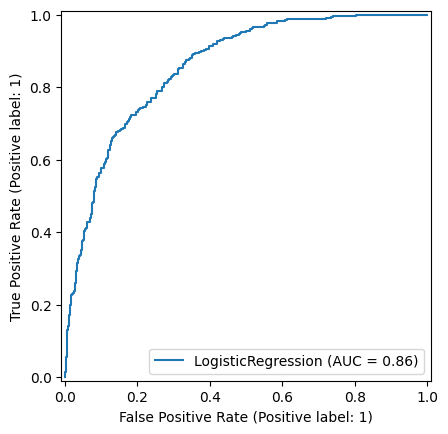

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, confusion_matrix

# model Logistic Regression
lr_model = LogisticRegression(max_iter=2000, random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

print("Logistic Regression:")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_lr):.2%}")
print(classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

RocCurveDisplay.from_estimator(lr_model, x_test, y_test)
plt.show()

In [7]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay, f1_score,recall_score, precision_score

# Lấy dự đoán xác suất từ các mô hình cơ sở cho Stacking
xgb_prob = xgb_model.predict_proba(x_test)[:, 1]
rf_prob = rf_model.predict_proba(x_test)[:, 1]
lr_prob = lr_model.predict_proba(x_test)[:, 1]

# Tạo tập dữ liệu meta-features từ các xác suất dự đoán
meta_X = np.column_stack((xgb_prob, rf_prob, lr_prob))

# Huấn luyện meta-learner (Logistic Regression)
meta_learner = LogisticRegression(max_iter=1000, random_state=42)
meta_learner.fit(meta_X, y_test)

# Dự đoán bằng Stacking Ensemble
meta_prob = meta_learner.predict_proba(meta_X)[:, 1]
meta_pred = meta_learner.predict(meta_X)

# So sánh hiệu suất với các mô hình cơ sở
models = {'XGBoost': xgb_model, 'Random Forest': rf_model,
          'Logistic Regression': lr_model, 'Stacking Ensemble': meta_learner}
results = {'Model': [], 'ROC-AUC': [], 'F1-Score': [], 'Recall': [], 'Precision': [], 'Accuracy': []}

for name, model in models.items():
    y_pred = model.predict(x_test) if name != 'Stacking Ensemble' else meta_pred
    y_prob = model.predict_proba(x_test)[:, 1] if name != 'Stacking Ensemble' else meta_prob
    results['Model'].append(name)
    results['ROC-AUC'].append(roc_auc_score(y_test, y_prob))
    results['F1-Score'].append(f1_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Accuracy'].append(accuracy_score(y_test, y_pred))

df_results = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(df_results)

c:\python\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Performance Summary:
                 Model   ROC-AUC  F1-Score    Recall  Precision  Accuracy
0              XGBoost  0.920819  0.840041  0.886710   0.798039  0.841189
1        Random Forest  0.859020  0.768635  0.864924   0.691638  0.755123
2  Logistic Regression  0.857119  0.752391  0.771242   0.734440  0.761270
3    Stacking Ensemble  0.921784  0.838298  0.858388   0.819127  0.844262


In [124]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

class StackingModel:
    def __init__(self):
        self.label_encoders = {}
        self.minmax_scaler = MinMaxScaler()
        self.std_scaler = StandardScaler()
        self.num_imputer = SimpleImputer(strategy='median')

        self.xgb_model = XGBClassifier(
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )
        self.rf_model = RandomForestClassifier(random_state=42)
        self.lr_model = LogisticRegression(max_iter=1000, random_state=42)
        self.meta_learner = LogisticRegression(max_iter=1000, random_state=42)

        self.features_to_encode = [
            'gender', 'ever_married', 'work_type',
            'Residence_type', 'smoking_status'
        ]
        self.feature_order = None

    def removeID(self, df: pd.DataFrame) -> pd.DataFrame:
        return df.drop(columns=['id'], errors='ignore')

    def preprocess(self, df: pd.DataFrame, fit: bool = False) -> pd.DataFrame:
        df = df.copy()

        # Fill NaN for categorical
        for col in self.features_to_encode:
            df[col] = df[col].fillna('Unknown')

        # Impute numeric values
        num_cols_all = ['age', 'avg_glucose_level', 'bmi']
        if fit:
            df[num_cols_all] = self.num_imputer.fit_transform(df[num_cols_all])
        else:
            df[num_cols_all] = self.num_imputer.transform(df[num_cols_all])

        # Encode categorical
        if fit:
            for col in self.features_to_encode:
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col].astype(str))
                self.label_encoders[col] = le
        else:
            for col in self.features_to_encode:
                le = self.label_encoders[col]
                df[col] = le.transform(df[col].astype(str))

        # Scale features
        cols_minmax = ['age', 'avg_glucose_level']
        cols_std = ['bmi']

        if fit:
            df[cols_minmax] = self.minmax_scaler.fit_transform(df[cols_minmax])
            df[cols_std] = self.std_scaler.fit_transform(df[cols_std])
        else:
            df[cols_minmax] = self.minmax_scaler.transform(df[cols_minmax])
            df[cols_std] = self.std_scaler.transform(df[cols_std])

        return df

    def fit(self, df, target_col='stroke', balance_strategy='over', under_ratio=0.1):
        df = self.removeID(df)
        df = self.preprocess(df, fit=True)

        x = df.drop(columns=[target_col])
        y = df[target_col]

        print("Phân phối nhãn trước xử lý:")
        print(y.value_counts())

        # Kiểm tra nếu mất cân bằng đáng kể thì mới thực hiện resampling
        ratio = y.value_counts().min() / y.value_counts().max()
        
        if ratio < 0.8:
            try:
                under = RandomUnderSampler(sampling_strategy=under_ratio, random_state=42)
                x, y = under.fit_resample(x, y)
                print("Đã under-sample")
            except ValueError as e:
                print("Under-sampling thất bại:", e)

            try:
                over = SMOTE(sampling_strategy=1.0, random_state=42)
                x, y = over.fit_resample(x, y)
                print("Đã over-sample")
            except ValueError as e:
                print("Over-sampling thất bại:", e)
        else:
            print("Bộ dữ liệu đã cân bằng, bỏ qua under/over sampling.")

        print("Phân phối nhãn sau xử lý:")
        print(y.value_counts())

        self.feature_order = x.columns.tolist()
        x_train, _, y_train, _ = train_test_split(x, y, test_size=0.2, random_state=42)

        self.xgb_model.fit(x_train, y_train)
        self.rf_model.fit(x_train, y_train)
        self.lr_model.fit(x_train, y_train)

        meta_X = np.column_stack([
            self.xgb_model.predict_proba(x_train)[:, 1],
            self.rf_model.predict_proba(x_train)[:, 1],
            self.lr_model.predict_proba(x_train)[:, 1]
        ])
        self.meta_learner.fit(meta_X, y_train)
        print("Đã huấn luyện xong mô hình stacking.")

    def _stack_features(self, df: pd.DataFrame) -> np.ndarray:
        return np.column_stack([
            self.xgb_model.predict_proba(df)[:, 1],
            self.rf_model.predict_proba(df)[:, 1],
            self.lr_model.predict_proba(df)[:, 1]
        ])

    def predict(self, df: pd.DataFrame) -> np.ndarray:
        df = self.removeID(df)
        df = self.preprocess(df, fit=False)[self.feature_order]
        meta_X = self._stack_features(df)
        return self.meta_learner.predict(meta_X)

    def predict_proba(self, df: pd.DataFrame) -> np.ndarray:
        df = self.removeID(df)
        df = self.preprocess(df, fit=False)[self.feature_order]
        meta_X = self._stack_features(df)
        return self.meta_learner.predict_proba(meta_X)[:, 1]

    def save(self, path: str = 'stacking_model.pkl'):
        joblib.dump(self, path)

    @staticmethod
    def load(path: str = 'stacking_model.pkl'):
        return joblib.load(path)

In [125]:
model = StackingModel()
model.fit(df)

Phân phối nhãn trước xử lý:
stroke
0    4861
1     249
Name: count, dtype: int64
Đã under-sample
Đã over-sample
Phân phối nhãn sau xử lý:
stroke
0    2490
1    2490
Name: count, dtype: int64


c:\python\lib\site-packages\xgboost\training.py:183: UserWarning: [19:22:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Đã huấn luyện xong mô hình stacking.


In [126]:
model.save("stacking_model.pkl")
print("Mô hình đã được lưu.")

Mô hình đã được lưu.


In [127]:
# Load mô hình
model = joblib.load("stacking_model.pkl")

In [128]:
df_new = df.drop(columns=['id','stroke'])
test_1 = df_new.head(5)
test_1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [129]:
label_1=df['stroke'].head(5)
print(label_1)

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64


In [130]:
pred = model.predict(test_1)
proba = model.predict_proba(test_1)

print("Dự đoán nhãn (0/1):")
print(pred)

print("\nXác suất dự đoán (label=1):")
print(proba)

Dự đoán nhãn (0/1):
[1 1 1 1 1]

Xác suất dự đoán (label=1):
[0.99694745 0.97451042 0.98381252 0.96919112 0.99691242]


In [131]:
df_new = df.drop(columns=['id','stroke'])
test_0 = df_new.tail(5)
test_0

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown


In [132]:
label_0=df['stroke'].tail(5)
print(label_0)

5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, dtype: int64


In [133]:
pred = model.predict(test_0)
proba = model.predict_proba(test_0)

print("Dự đoán nhãn (0/1):")
print(pred)

print("\nXác suất dự đoán (label=1):")
print(proba)

Dự đoán nhãn (0/1):
[1 0 0 0 0]

Xác suất dự đoán (label=1):
[0.57803429 0.00193312 0.00155844 0.00205836 0.00266766]


In [143]:
np.random.seed(1)
n = 20

# Tạo các cột dựa trên phân bố quan sát
df_fake = pd.DataFrame({
    'gender': np.random.choice(['Male', 'Female'], p=[0.4, 0.6], size=n),
    'age': np.round(np.random.normal(loc=60, scale=12, size=n), 1),  # trung bình tuổi ~60
    'hypertension': np.random.choice([0, 1], p=[0.85, 0.15], size=n),
    'heart_disease': np.random.choice([0, 1], p=[0.9, 0.1], size=n),
    'ever_married': 'Yes',  # Gần như toàn bộ đều là Yes
    'work_type': np.random.choice(['Private', 'Self-employed', 'Govt_job'], p=[0.6, 0.3, 0.1], size=n),
    'Residence_type': np.random.choice(['Urban', 'Rural'], size=n),
    'avg_glucose_level': np.round(np.random.normal(loc=120, scale=40, size=n), 2),
    'bmi': np.round(np.random.normal(loc=29, scale=5, size=n), 1),
    'smoking_status': np.random.choice(['never smoked', 'formerly smoked', 'smokes', 'Unknown'],
                                       p=[0.6, 0.15, 0.15, 0.1], size=n)
})

# Giới hạn giá trị bất hợp lý (âm hoặc quá cao)
df_fake['age'] = df_fake['age'].clip(20, 85)
df_fake['avg_glucose_level'] = df_fake['avg_glucose_level'].clip(50, 250)
df_fake['bmi'] = df_fake['bmi'].clip(15, 45)

# Giới thiệu giá trị thiếu ngẫu nhiên cho cột bmi (~10%)
nan_indices = np.random.choice(df_fake.index, size=int(n * 0.1), replace=False)
df_fake.loc[nan_indices, 'bmi'] = np.nan

# Gán nhãn stroke = 1 nếu có >=2 yếu tố nguy cơ
def label_stroke(row):
    risk = 0
    if row['age'] >= 65: risk += 1
    if row['hypertension'] == 1: risk += 1
    if row['heart_disease'] == 1: risk += 1
    if row['avg_glucose_level'] > 180: risk += 1
    if pd.notna(row['bmi']) and row['bmi'] > 35: risk += 1
    return 1 if risk >= 2 else 0

df_fake['stroke'] = df_fake.apply(label_stroke, axis=1)

In [144]:
df_fake.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,73.6,0,0,Yes,Private,Rural,124.87,NaN,formerly smoked,0
1,Female,46.8,0,0,Yes,Private,Urban,165.18,29.2,never smoked,0
2,Male,57.9,0,1,Yes,Govt_job,Rural,167.96,22.1,never smoked,0
3,Male,49.5,0,0,Yes,Private,Urban,127.41,30.6,never smoked,0
4,Male,60.5,0,0,Yes,Private,Rural,104.99,33.2,formerly smoked,0


In [145]:
labels = df_fake['stroke']
print(labels)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    0
17    1
18    0
19    0
Name: stroke, dtype: int64


In [146]:
x_test_fake = df_fake.drop(columns=['stroke'])
x_test_fake.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,73.6,0,0,Yes,Private,Rural,124.87,NaN,formerly smoked
1,Female,46.8,0,0,Yes,Private,Urban,165.18,29.2,never smoked
2,Male,57.9,0,1,Yes,Govt_job,Rural,167.96,22.1,never smoked
3,Male,49.5,0,0,Yes,Private,Urban,127.41,30.6,never smoked
4,Male,60.5,0,0,Yes,Private,Rural,104.99,33.2,formerly smoked


In [147]:
labels = df_fake['stroke']
labels

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    0
17    1
18    0
19    0
Name: stroke, dtype: int64

In [148]:
pred = model.predict(x_test_fake)
proba = model.predict_proba(x_test_fake)

print("Dự đoán nhãn (0/1):")
print(pred)

print("\nXác suất dự đoán (label=1):")
print(proba)

Dự đoán nhãn (0/1):
[1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0]

Xác suất dự đoán (label=1):
[0.99612873 0.4367897  0.02385373 0.02170986 0.97506336 0.21009081
 0.01864686 0.9788239  0.887579   0.47935225 0.01826713 0.3623064
 0.90831445 0.00122429 0.88825593 0.99335746 0.13924331 0.39105907
 0.00280654 0.00792562]


In [149]:
# Nhập liệu từ người dùng
age = float(input("Nhập tuổi: "))
gender = input("Nhập giới tính (Male/Female): ")
hypertension = int(input("Có bị tăng huyết áp không? (0: Không, 1: Có): "))
heart_disease = int(input("Có bệnh tim không? (0: Không, 1: Có): "))
ever_married = input("Đã từng kết hôn chưa? (Yes/No): ")
work_type = input("Loại công việc (Private/Self-employed/Govt_job/children/Never_worked): ")
residence_type = input("Khu vực sinh sống (Urban/Rural): ")
avg_glucose_level = float(input("Mức đường huyết trung bình: "))
bmi = float(input("Chỉ số BMI: "))
smoking_status = input("Tình trạng hút thuốc (formerly smoked/never smoked/smokes/Unknown): ")

# Tạo dictionary chứa input
user_input = {
    'gender': [gender],
    'age': [age],
    'hypertension': [hypertension],
    'heart_disease': [heart_disease],
    'ever_married': [ever_married],
    'work_type': [work_type],
    'Residence_type': [residence_type],
    'avg_glucose_level': [avg_glucose_level],
    'bmi': [bmi],
    'smoking_status': [smoking_status]
}

# Chuyển thành DataFrame
df_manual = pd.DataFrame(user_input)

pred = model.predict(df_manual)
proba = model.predict_proba(df_manual)

print("Dự đoán nhãn (0/1):")
print(pred)

print("\nXác suất dự đoán (label=1):")
print(proba)

Dự đoán nhãn (0/1):
[1]

Xác suất dự đoán (label=1):
[0.86794211]
